In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

with open("P02089.fasta") as file:
    for record in SeqIO.parse(file, "fasta"):
        print(record.id)

In [ ]:
from Bio import SeqIO

for record in SeqIO.parse("P02089.fasta", "fasta"):
    print(record.seq)


In [ ]:
record.seq

In [ ]:
f = open("P02089.fasta", "r")
read = f.read()
print(read)

In [ ]:
f = open("P02089.fasta", "r")
read = f.read()
seq = ""
read = read.split("\n")
for i in read:
    if ">" not in i:
        seq+=i
        
print(seq)

In [ ]:
type(read)

Dotplot


In [ ]:
import numpy as np

f = open("P02089.fasta", "r")
read = f.read()
seq1 = ""
read = read.split("\n")
for i in read:
    if ">" not in i:
        seq1+=i

f_human = open("P68871.fasta", "r")
read_human = f_human.read()
seq2 = ""
read_human = read_human.split("\n")
for i in read_human:
    if ">" not in i:
        seq2+=i   
        
dotplot = np.zeros((len(seq1),len(seq2)))
for i in range(len(seq1)):
    for j in range(len(seq2)):
        if seq1[i] == seq2[j]:
            dotplot[i,j] = 1
        else:
            dotplot[i,j] = 0
print(dotplot)

In [ ]:
from Bio import SeqIO
from urllib.error import HTTPError  # Importujemy wyjątek HTTPError

import requests
import numpy as np

def get_uniprot_sequence(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Sprawdź, czy odpowiedź nie zawiera błędu HTTP
        fasta_data = response.text
        lines = fasta_data.split('\n')
        seq = ''.join(lines[1:])  # Pobierz sekwencję z linii 2 i dalej (pomiń nagłówek)
        return seq
    except requests.exceptions.HTTPError as e:
        print(f"Wystąpił błąd HTTP: {e}")
        return None
    except Exception as e:
        print(f"Wystąpił inny błąd: {e}")
        return None

def start():
    while True:
        print("Wybierz metodę wprowadzania sekwencji: plik FASTA(1) lub ID Uniprot(2)")
        choice = input()
        if choice == "1":
            print("Podaj nazwę pliku")
            name = input()
            seq = ""  # Inicjalizacja zmiennej seq
            try:
                with open(name, "r") as f:  # Użyj 'with' do otwarcia pliku, aby uniknąć zapominania o zamknięciu pliku
                    read = f.read()
                    read = read.split("\n")
                    for i in read:
                        if ">" not in i:
                            seq += i
            except IOError as e:
                print("Wystąpił wyjątek:", e)
            return seq
        elif choice == "2":
            print("Podaj ID Uniprot")
            uniprot_id = input()
            seq = get_uniprot_sequence(uniprot_id)
            if seq:
                return seq
            else:
                print("Nie udało się pobrać sekwencji dla podanego ID Uniprot.")
        else:
            print("Błędna opcja")

start()

In [1]:
import numpy as np

class Sequence:
    def __init__(self, seq, name="default", id=000000):
        self.sequence = seq
        self.length = len(seq)
        self.name = name
        self.id = id
        
    def __str__(self):
        return self.sequence
    
    def get_length(self):
        return self.length
    
    def dotplot(self, seq2):
        dp = np.zeros((self.length, seq2.get_length()))
        for i in range(self.length):
            for j in range(seq2.get_length()):
                if self.sequence[i] == seq2.sequence[j]:
                    dp[i,j] = 1
                else:
                    dp[i,j] = 0
        return dp


In [ ]:
import requests
import numpy as np

def get_uniprot_sequence(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Sprawdź, czy odpowiedź nie zawiera błędu HTTP
        fasta_data = response.text
        lines = fasta_data.split('\n')
        seq = ''.join(lines[1:])  # Pobierz sekwencję z linii 2 i dalej (pomiń nagłówek)
        return seq
    except requests.exceptions.HTTPError as e:
        print(f"Wystąpił błąd HTTP: {e}")
        return None
    except Exception as e:
        print(f"Wystąpił inny błąd: {e}")
        return None

def start():
    while True:
        print("Wybierz metodę wprowadzania sekwencji: plik FASTA(1) lub ID Uniprot(2)")
        choice = input()
        if choice == "1":
            print("Podaj nazwę pliku")
            name = input()
            seq = ""  # Inicjalizacja zmiennej seq
            try:
                with open(name, "r") as f:  # Użyj 'with' do otwarcia pliku, aby uniknąć zapominania o zamknięciu pliku
                    read = f.read()
                    read = read.split("\n")
                    for i in read:
                        if ">" not in i:
                            seq += i
            except IOError as e:
                print("Wystąpił wyjątek:", e)
            return seq
        elif choice == "2":
            print("Podaj ID Uniprot")
            uniprot_id = input()
            seq = get_uniprot_sequence(uniprot_id)
            if seq:
                return seq
            else:
                print("Nie udało się pobrać sekwencji dla podanego ID Uniprot.")
        else:
            print("Błędna opcja")

print("Wybierz pierwszą sekwencję:")
seq1 = Sequence(start())
print("Wybierz drugą sekwencję:")
seq2 = Sequence(start())
dp = seq1.dotplot(seq2)
print(dp)
np.savetxt("dotplot.txt", dp, fmt="%d")


In [ ]:
type(dp)

In [2]:
import numpy as np

class Dotplot:
    def __init__(self, array):
        self.array = array
        self.size = len(array)
        
    def __getitem__(self, index):
        n, m = index
        return self.array[n][m]
    
    def __setitem__(self, index, val):
        n, m = index
        self.array[n][m] = val
        
    def __str__(self):
        return str(self.array)
    
    def saveTxt(self, filename):
        np.savetxt(filename, self.array, fmt="%d")


In [6]:
import requests
import numpy as np
import re

def seqConstructor(fasta_data):
    lines = fasta_data.split('\n')

    # Sprawdź, czy sekwencja zawiera nagłówek
    if not lines[0].startswith('>'):
        print("Błąd: Brak nagłówka w sekwencji FASTA.")
        return None

    seq = ''.join(lines[1:])

    # Sprawdź, czy sekwencja zawiera nielegalne znaki
    basic_amino_acids = {'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'}

    if not set(seq).issubset(basic_amino_acids):
        print("Błąd: Sekwencja zawiera nielegalne znaki.")
        return None

    match = re.match(r">sp\|(\w+)\|(\w+)OS", lines[0])
    id = None
    name = None
    if match:
        id = match.group(1)
        name = match.group(2)
    
    protein = Sequence(seq, id=id, name=name)
    return protein




def get_uniprot_sequence(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Sprawdź, czy odpowiedź nie zawiera błędu HTTP
        fasta_data = response.text
        seq = seqConstructor(fasta_data)
        return seq
    except requests.exceptions.HTTPError as e:
        print(f"Wystąpił błąd HTTP: {e}")
        return None
    except Exception as e:
        print(f"Wystąpił inny błąd: {e}")
        return None




    
def start():
    while True:
        print("Wybierz metodę wprowadzania sekwencji: plik FASTA(1) lub ID Uniprot(2)")
        choice = input()
        if choice == "1":
            print("Podaj nazwę pliku")
            name = input()
            seq = ""  # Inicjalizacja zmiennej seq
            try:
                with open(name, "r") as f:  # Użyj 'with' do otwarcia pliku, aby uniknąć zapominania o zamknięciu pliku
                    read = f.read()
                    seq = seqConstructor(read)
            except IOError as e:
                print("Wystąpił wyjątek:", e)
            return seq
        elif choice == "2":
            print("Podaj ID Uniprot")
            uniprot_id = input()
            seq = get_uniprot_sequence(uniprot_id)
            if seq:
                return seq
            else:
                print("Nie udało się pobrać sekwencji dla podanego ID Uniprot.")
        else:
            print("Błędna opcja")

print("Wybierz pierwszą sekwencję:")
seq1 = start()
print("Wybierz drugą sekwencję:")
seq2 = start()
dp = Dotplot(seq1.dotplot(seq2))

print(dp)
dp.saveTxt("dotplot.txt")

Wybierz pierwszą sekwencję:
Wybierz metodę wprowadzania sekwencji: plik FASTA(1) lub ID Uniprot(2)
Podaj nazwę pliku
Wybierz drugą sekwencję:
Wybierz metodę wprowadzania sekwencji: plik FASTA(1) lub ID Uniprot(2)
Podaj nazwę pliku
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


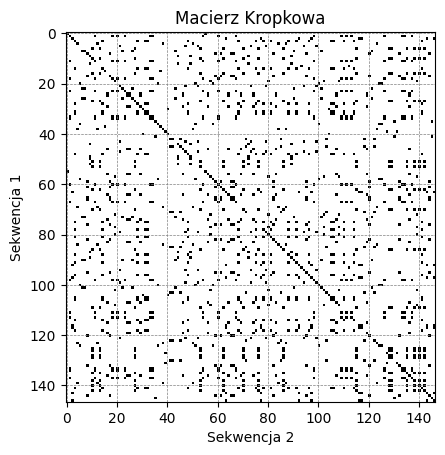

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowa macierz kropkowa
dot_matrix = dp.array

# Wyświetlenie macierzy kropkowej
plt.imshow(dot_matrix, cmap='binary', interpolation='nearest')

# Tytuł wykresu i osi
plt.title('Macierz Kropkowa')
plt.xlabel('Sekwencja 2')
plt.ylabel('Sekwencja 1')

# Dodanie siatki
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Ustawienie kropek na osiach
#plt.xticks(np.arange(-0.5, 5.5, 1), np.arange(0, 6, 1))
#plt.yticks(np.arange(-0.5, 5.5, 1), np.arange(0, 6, 1))

# Dodanie legendy
#plt.colorbar(label='Wartość')

# Wyświetlenie wykresu
plt.show()


In [8]:
type(dp)

__main__.Dotplot

In [10]:
seq1.get_length()


147